Data size ameliorates overfitting phenomenon. Check Sec. 1.2.4 of the book of Christopher Bishop on deep learning.

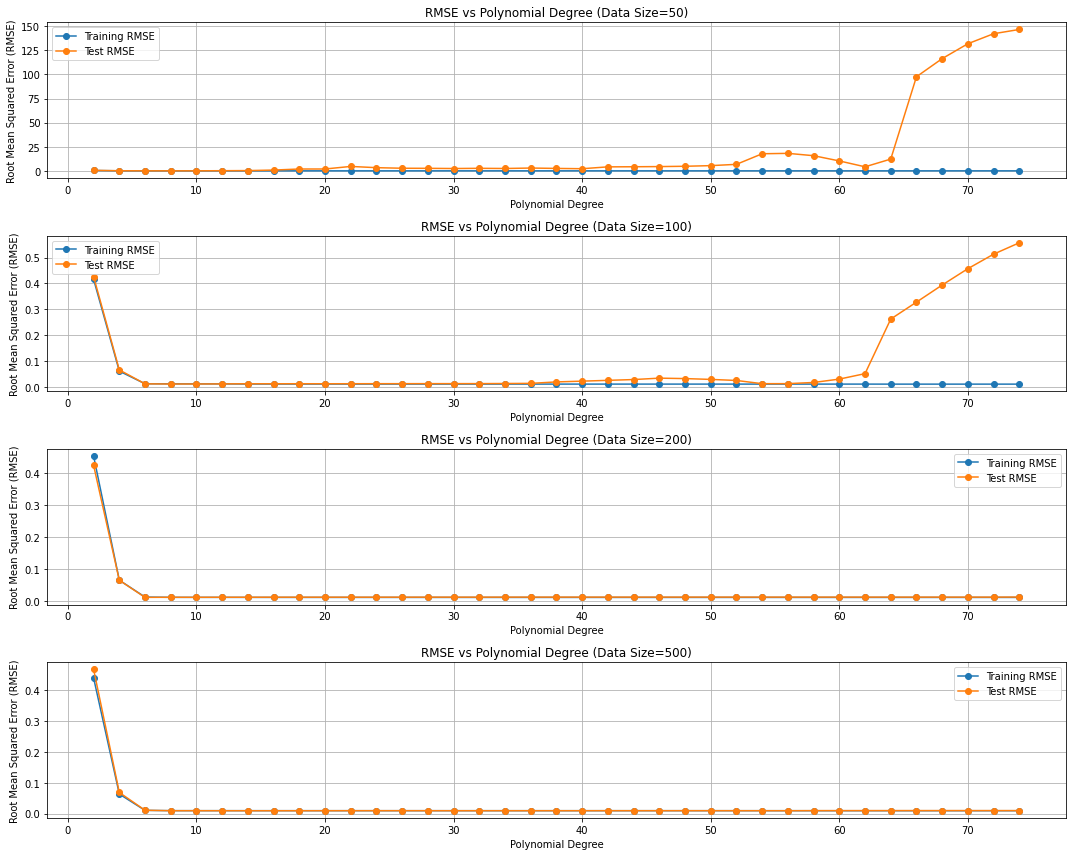

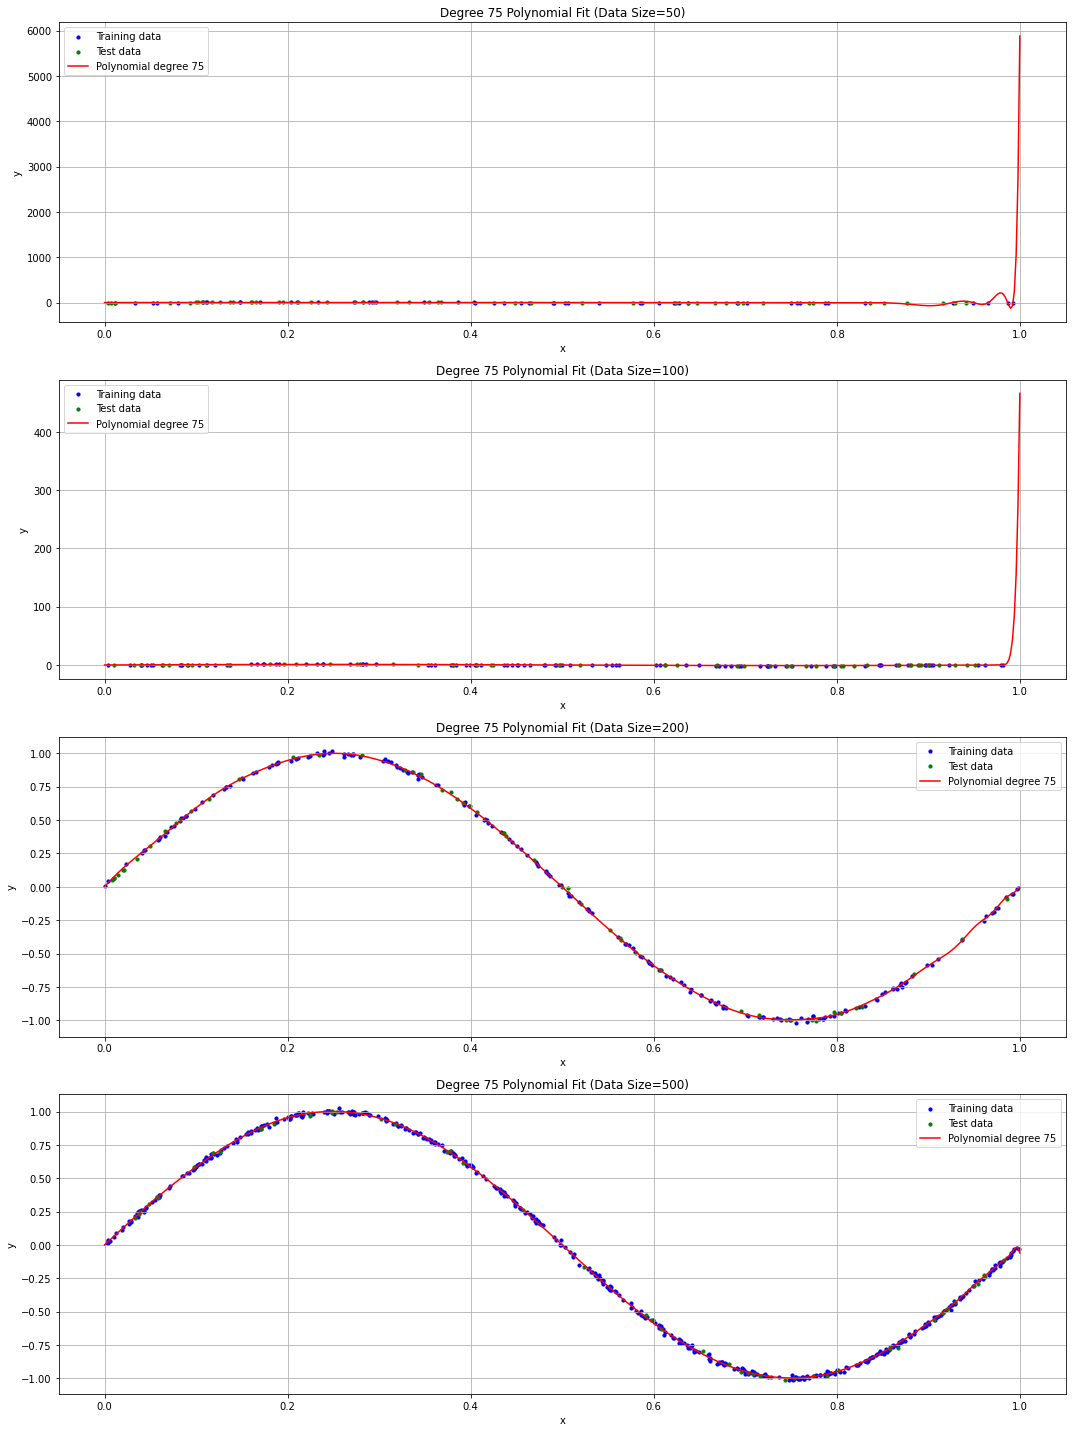

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate noisy data
def generate_noisy_data(size):
    x = np.sort(np.random.rand(size))  # Training data points
    y = np.sin(2 * np.pi * x) + np.random.normal(0, 0.01, x.shape)  # Add noise
    return x, y

# Function to create polynomial features
def polynomial_features(x, degree):
    return np.vander(x, degree + 1, increasing=True)

# Function to fit polynomial regression
def polynomial_regression(x, y, degree):
    X = polynomial_features(x, degree)
    coeffs = np.linalg.lstsq(X, y, rcond=None)[0]
    return coeffs

# Function to predict using polynomial regression
def predict(x, coeffs):
    degree = len(coeffs) - 1
    X = polynomial_features(x, degree)
    return X @ coeffs

# Data sizes to experiment with
data_sizes = [50, 100, 200, 500]  # Different sizes of training data
degrees = range(2, 76, 2)  # Polynomial degrees from 2 to 75 in steps of 2

# Plot RMSE for different data sizes
plt.figure(figsize=(15, 12))

for idx, size in enumerate(data_sizes):
    x_train, y_train = generate_noisy_data(size)  # Generate training data
    x_test, y_test = generate_noisy_data(50)  # Generate test data
    
    train_errors = []
    test_errors = []
    
    # Loop over polynomial degrees
    for degree in degrees:
        # Fit model
        coeffs = polynomial_regression(x_train, y_train, degree)
        
        # Compute training and test predictions
        y_train_pred = predict(x_train, coeffs)
        y_test_pred = predict(x_test, coeffs)
        
        # Compute RMSE
        train_rmse = np.sqrt(np.mean((y_train - y_train_pred) ** 2))
        test_rmse = np.sqrt(np.mean((y_test - y_test_pred) ** 2))
        
        train_errors.append(train_rmse)
        test_errors.append(test_rmse)
    
    # Plot RMSE for current data size
    plt.subplot(len(data_sizes), 1, idx + 1)
    plt.plot(degrees, train_errors, label='Training RMSE', marker='o')
    plt.plot(degrees, test_errors, label='Test RMSE', marker='o')
    plt.xlabel('Polynomial Degree')
    plt.ylabel('Root Mean Squared Error (RMSE)')
    plt.title(f'RMSE vs Polynomial Degree (Data Size={size})')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

# Plot polynomial fits for degree 75
plt.figure(figsize=(15, 20))  # Figure size for polynomial fits
x_range = np.linspace(0, 1, 500)  # High-resolution x values for smooth curve

for idx, size in enumerate(data_sizes):
    x_train, y_train = generate_noisy_data(size)  # Generate training data
    x_test, y_test = generate_noisy_data(50)  # Generate test data

    # Fit model with degree 75
    coeffs = polynomial_regression(x_train, y_train, 75)
    
    # Compute predictions
    y_train_pred = predict(x_train, coeffs)
    y_test_pred = predict(x_test, coeffs)
    y_range_pred = predict(x_range, coeffs)

    # Plot training and test data with polynomial fit
    plt.subplot(len(data_sizes), 1, idx + 1)
    plt.scatter(x_train, y_train, color='blue', label='Training data', s=10)
    plt.scatter(x_test, y_test, color='green', label='Test data', s=10)
    plt.plot(x_range, y_range_pred, color='red', label='Polynomial degree 75')
    plt.title(f'Degree 75 Polynomial Fit (Data Size={size})')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()
